In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# 1. Data - Raw ver.

In [4]:
address = 'C:/Users/hjbvl/Practice Data/'
train_features = pd.read_csv(address + 'train_features_raw.csv')
train_labels = pd.read_csv(address + 'train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,62.0,0,0,10.5000,147,2
1,3,1,8.0,4,1,29.1250,147,1
2,3,1,32.0,0,0,56.4958,147,2
3,3,0,20.0,1,0,9.8250,147,2
4,2,0,28.0,0,0,13.0000,147,2


<Axes: >

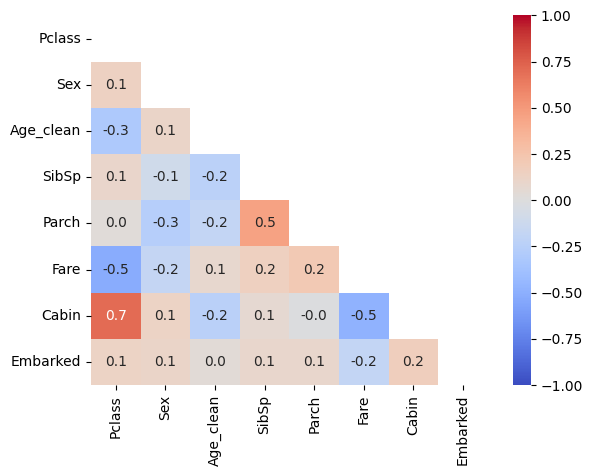

In [6]:
# Generate correlation matrix heatmap
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [7]:
# GridSearchCV
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [8]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Params: {'max_depth': 8, 'n_estimators': 64}

0.798 (+/-0.103) for {'max_depth': 2, 'n_estimators': 8}
0.775 (+/-0.07) for {'max_depth': 2, 'n_estimators': 16}
0.766 (+/-0.141) for {'max_depth': 2, 'n_estimators': 32}
0.796 (+/-0.117) for {'max_depth': 2, 'n_estimators': 64}
0.8 (+/-0.099) for {'max_depth': 2, 'n_estimators': 128}
0.79 (+/-0.106) for {'max_depth': 2, 'n_estimators': 256}
0.792 (+/-0.111) for {'max_depth': 2, 'n_estimators': 512}
0.818 (+/-0.069) for {'max_depth': 4, 'n_estimators': 8}
0.818 (+/-0.119) for {'max_depth': 4, 'n_estimators': 16}
0.822 (+/-0.093) for {'max_depth': 4, 'n_estimators': 32}
0.826 (+/-0.112) for {'max_depth': 4, 'n_estimators': 64}
0.822 (+/-0.107) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.11) for {'max_depth': 4, 'n_estimators': 256}
0.82 (+/-0.11) for {'max_depth': 4, 'n_estimators': 512}
0.835 (+/-0.052) for {'max_depth': 8, 'n_estimators': 8}
0.839 (+/-0.036) for {'max_depth': 8, 'n_estimators': 16}
0.837 (+/-0.064) for {'ma

## Feature Importance

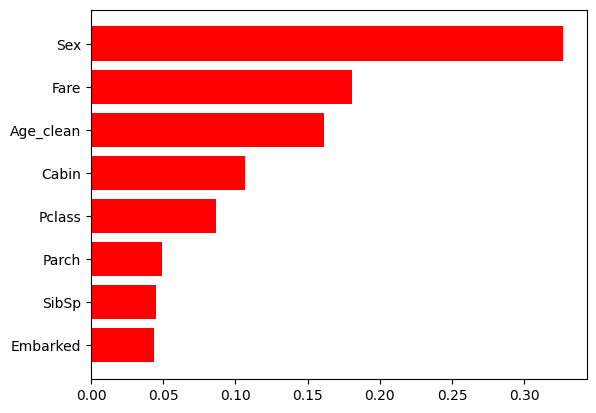

In [9]:
# Generate feature importance plot
feat_importance = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_importance)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_importance[indices], color='r', align='center')
plt.show()

In [11]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, address + 'mdl_raw_original_features.pkl')

['C:/Users/hjbvl/Practice Data/mdl_raw_original_features.pkl']

# 2. Data - Cleaned ver.

In [12]:
# Fit the model on Cleaned Original features
train_features = pd.read_csv(address + 'train_features_original.csv')a
train_labels = pd.read_csv(address + 'train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,2,1,62.0,0,0,10.5000,147,3
1,3,1,8.0,4,1,29.1250,147,2
2,3,1,32.0,0,0,56.4958,147,3
3,3,0,20.0,1,0,9.8250,147,3
4,2,0,28.0,0,0,13.0000,147,3


<Axes: >

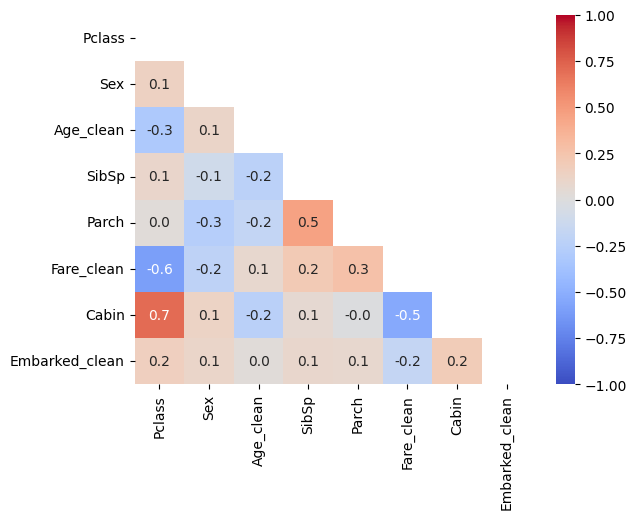

In [17]:
# Generate correlation matrix heatmap
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', mask=matrix)

In [18]:
# GridSearchCV
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [19]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Params: {'max_depth': 8, 'n_estimators': 128}

0.796 (+/-0.089) for {'max_depth': 2, 'n_estimators': 8}
0.792 (+/-0.119) for {'max_depth': 2, 'n_estimators': 16}
0.775 (+/-0.11) for {'max_depth': 2, 'n_estimators': 32}
0.794 (+/-0.102) for {'max_depth': 2, 'n_estimators': 64}
0.785 (+/-0.1) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.103) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/-0.109) for {'max_depth': 2, 'n_estimators': 512}
0.815 (+/-0.105) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.12) for {'max_depth': 4, 'n_estimators': 16}
0.815 (+/-0.106) for {'max_depth': 4, 'n_estimators': 32}
0.817 (+/-0.1) for {'max_depth': 4, 'n_estimators': 64}
0.817 (+/-0.111) for {'max_depth': 4, 'n_estimators': 128}
0.82 (+/-0.11) for {'max_depth': 4, 'n_estimators': 256}
0.818 (+/-0.116) for {'max_depth': 4, 'n_estimators': 512}
0.82 (+/-0.061) for {'max_depth': 8, 'n_estimators': 8}
0.82 (+/-0.05) for {'max_depth': 8, 'n_estimators': 16}
0.839 (+/-0.035) for {'max_de

## Feature Importance

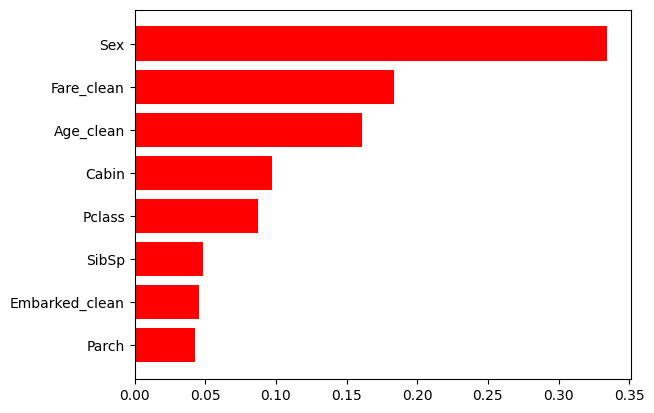

In [20]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [22]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, address + 'mdl_cleaned_original_features.pkl')

['C:/Users/hjbvl/Practice Data/mdl_cleaned_original_features.pkl']

# 3. Data - All Features

In [23]:
# All Features
train_features = pd.read_csv(address + 'train_features_all.csv')
train_labels = pd.read_csv(address + 'train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,2,1,62.0,0,0,10.5000,1.600434,147,0,3,11,0
1,3,1,8.0,4,1,29.1250,1.962697,147,0,2,7,5
2,3,1,32.0,0,0,56.4958,2.240801,147,0,3,11,0
3,3,0,20.0,1,0,9.8250,1.579307,147,0,3,8,1
4,2,0,28.0,0,0,13.0000,1.670278,147,0,3,8,0


<Axes: >

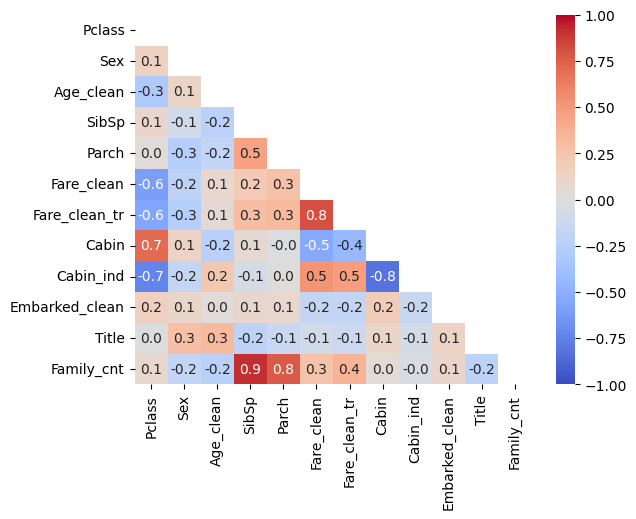

In [24]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [26]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Params: {'max_depth': 4, 'n_estimators': 8}

0.762 (+/-0.128) for {'max_depth': 2, 'n_estimators': 8}
0.796 (+/-0.121) for {'max_depth': 2, 'n_estimators': 16}
0.783 (+/-0.125) for {'max_depth': 2, 'n_estimators': 32}
0.783 (+/-0.119) for {'max_depth': 2, 'n_estimators': 64}
0.777 (+/-0.122) for {'max_depth': 2, 'n_estimators': 128}
0.785 (+/-0.111) for {'max_depth': 2, 'n_estimators': 256}
0.785 (+/-0.122) for {'max_depth': 2, 'n_estimators': 512}
0.843 (+/-0.087) for {'max_depth': 4, 'n_estimators': 8}
0.837 (+/-0.067) for {'max_depth': 4, 'n_estimators': 16}
0.818 (+/-0.088) for {'max_depth': 4, 'n_estimators': 32}
0.818 (+/-0.083) for {'max_depth': 4, 'n_estimators': 64}
0.826 (+/-0.088) for {'max_depth': 4, 'n_estimators': 128}
0.826 (+/-0.095) for {'max_depth': 4, 'n_estimators': 256}
0.828 (+/-0.095) for {'max_depth': 4, 'n_estimators': 512}
0.824 (+/-0.075) for {'max_depth': 8, 'n_estimators': 8}
0.824 (+/-0.084) for {'max_depth': 8, 'n_estimators': 16}
0.826 (+/-0.049) fo

## Feature Importance

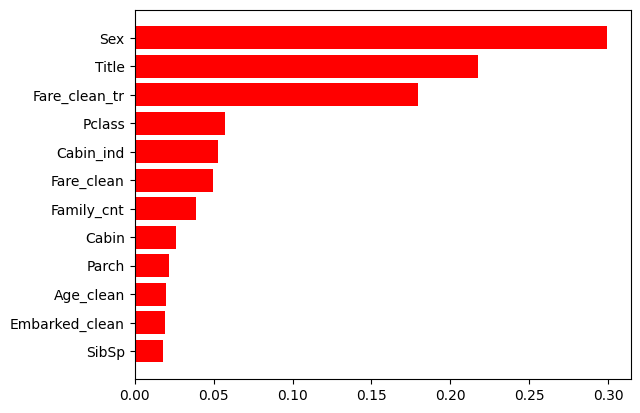

In [27]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [28]:
# write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, address + 'mdl_all_features.pkl')

['C:/Users/hjbvl/Practice Data/mdl_all_features.pkl']

# 4. Data - Reduced Features

In [29]:
# Reduced Features
train_features = pd.read_csv(address + 'train_features_reduced.csv')
train_labels = pd.read_csv(address + 'train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,2,1,62.0,0,1.600434,0,11
1,3,1,8.0,5,1.962697,0,7
2,3,1,32.0,0,2.240801,0,11
3,3,0,20.0,1,1.579307,0,8
4,2,0,28.0,0,1.670278,0,8


<Axes: >

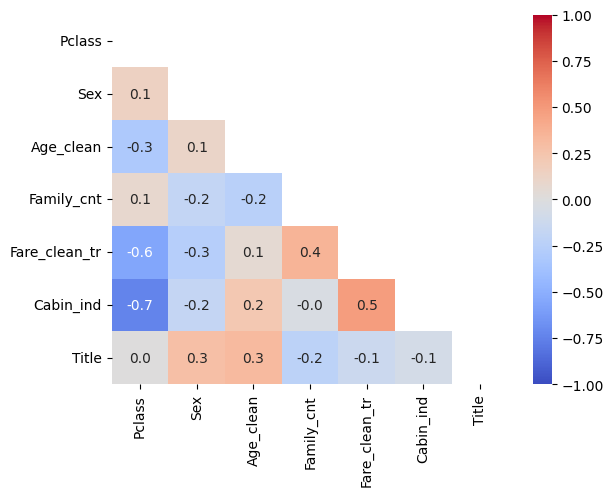

In [30]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [31]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Params: {'max_depth': 16, 'n_estimators': 32}

0.779 (+/-0.139) for {'max_depth': 2, 'n_estimators': 8}
0.789 (+/-0.123) for {'max_depth': 2, 'n_estimators': 16}
0.789 (+/-0.118) for {'max_depth': 2, 'n_estimators': 32}
0.788 (+/-0.113) for {'max_depth': 2, 'n_estimators': 64}
0.785 (+/-0.118) for {'max_depth': 2, 'n_estimators': 128}
0.787 (+/-0.118) for {'max_depth': 2, 'n_estimators': 256}
0.785 (+/-0.119) for {'max_depth': 2, 'n_estimators': 512}
0.809 (+/-0.124) for {'max_depth': 4, 'n_estimators': 8}
0.822 (+/-0.098) for {'max_depth': 4, 'n_estimators': 16}
0.822 (+/-0.108) for {'max_depth': 4, 'n_estimators': 32}
0.817 (+/-0.107) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.099) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.101) for {'max_depth': 4, 'n_estimators': 256}
0.813 (+/-0.105) for {'max_depth': 4, 'n_estimators': 512}
0.82 (+/-0.088) for {'max_depth': 8, 'n_estimators': 8}
0.811 (+/-0.076) for {'max_depth': 8, 'n_estimators': 16}
0.818 (+/-0.069) fo

## Feature Importance

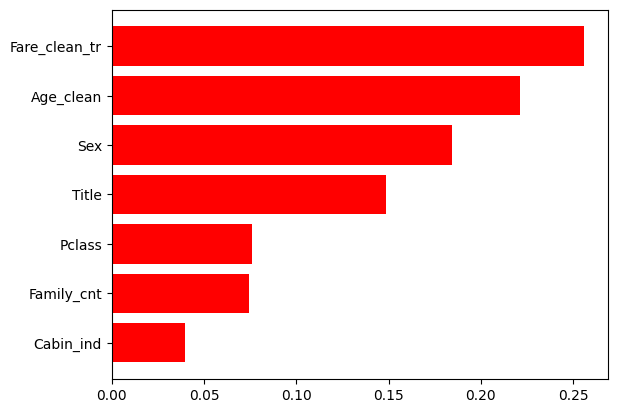

In [32]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [33]:
# write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, address + 'mdl_reduced_features.pkl')

['C:/Users/hjbvl/Practice Data/mdl_reduced_features.pkl']

# 5. Compare and Evalute Four Models

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

# Import validation data
val_features_raw = pd.read_csv(address + 'val_features_raw.csv')
val_features_original = pd.read_csv(address + 'val_features_original.csv')
val_features_all = pd.read_csv(address + 'val_features_all.csv')
val_features_reduced = pd.read_csv(address + 'val_features_reduced.csv')
val_labels = pd.read_csv(address + 'val_labels.csv')

val_features_raw.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,29.699118,1,0,89.1042,86,0
1,1,1,45.500000,0,0,28.5000,56,2
2,3,1,29.699118,0,0,7.7500,147,1
3,2,0,24.000000,1,0,26.0000,147,2
4,2,1,36.000000,0,0,12.8750,90,0


In [41]:
models = {}

# Import pkl files
for mdl in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load(address + 'mdl_{}_features.pkl'.format(mdl))

In [44]:
# Evaluate Models on the validation set
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                    accuracy,
                                                                                    precision,
                                                                                    recall,
                                                                                    round((end - start)*1000, 1)))

In [45]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw_original'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_original, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.798 / Precision: 0.774 / Recall: 0.631 / Latency: 13.4ms
Cleaned Features -- 	Accuracy: 0.803 / Precision: 0.778 / Recall: 0.646 / Latency: 11.7ms
All Features -- 	Accuracy: 0.815 / Precision: 0.767 / Recall: 0.708 / Latency: 1.0ms
Reduced Features -- 	Accuracy: 0.775 / Precision: 0.698 / Recall: 0.677 / Latency: 3.0ms


In [47]:
# Read in the test features
test_features = pd.read_csv(address + 'test_features_all.csv')
test_labels = pd.read_csv(address + 'test_labels.csv')

In [48]:
# Evaluate our final model on the test set
evaluate_model('All Features', models['all'], test_features, test_labels)

All Features -- 	Accuracy: 0.816 / Precision: 0.821 / Recall: 0.724 / Latency: 3.1ms
